<h1><center> Multilayer Perceptron for the MNIST dataset </center></h1>

# Theoretical info
A **Multilayer Perceptron** (MLP) is the name for a modern *feedforward neural network* consisting of *fully connected neurons* with *nonlinear activation functions*, *organized in layers*, notable for being able to distinguish data that is not linearly separable.  

## Architecture of Multi-Layer Perceptron Classifier
  
1. *Input Layer*: This layer is composed of neurons that receive the features of the dataset. Each neuron in the input layer represents a specific feature of the data. The number of neurons in the input layer equals the number of features in the dataset.
  
2. *Hidden Layer*: One or more hidden layers may exist between the input and output layers. The number of hidden layers and neurons in each hidden layer is determined by hyperparameters
  
3. *Output Layer*: The final predictions or outputs are generated by the output layer using the data processed in the hidden levels.
  
<center>
  <img src="https://media.datacamp.com/legacy/v1725638284/image_bd3b978959.png" alt="MLP with two hidden layers" width="500"/>
</center>

In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

# Data Preprocessing
  
Before we start training an MLP model, we need to have the correct training and testing data.  
  
The **MNIST database** consists of handwritten digits and has a training set of 60,000 examples, and a test set of 10,000 examples.
- The *input features* are represented by pixels in of 28 x 28 pixel grayscale images.
- The *target variable* is numerical and categorical, consisting of the values of digits 0 - 9.

## Import the MNIST dataset

In [2]:
# Import the MNIST dataset
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

**Extracted data**:  
  
`x_train`: `uint8` NumPy array of grayscale image data with shapes `(60000, 28, 28)`, containing the training data. Pixel values range from 0 to 255.
  
`y_train`: `uint8` NumPy array of digit labels (integers in range 0-9) with shape `(60000,)` for the training data.
  
`x_test`: `uint8` NumPy array of grayscale image data with shapes `(10000, 28, 28)`, containing the test data. Pixel values range from 0 to 255.
  
`y_test`: `uint8` NumPy array of digit labels (integers in range 0-9) with shape `(10000,)` for the test data.

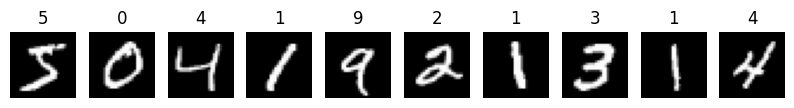

In [3]:
# Display first few entries in the training dataset, alongside their labels

num_images = 10
plt.figure(figsize=(10, 1))

for i in range(num_images):
  plt.subplot(1, num_images, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
  plt.title(str(y_train[i]))

plt.show()

## Normalize pixel data and flatten images

In [4]:
# Normalize input data to values between 0 and 1 and flatten images to vectors

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

assert x_train.shape == (60000, 784)
assert x_test.shape == (10000, 784)

**Processed data**:
  
`x_train`: `float32` NumPy array of grayscale image data with shapes `(60000, 784)`, containing the training data. Pixel values range from 0 to 1.
  
`y_train`: `uint8` NumPy array of digit labels (integers in range 0-9) with shape `(60000,)` for the training data.
  
`x_test`: `float32` NumPy array of grayscale image data with shapes `(10000, 784)`, containing the test data. Pixel values range from 0 to 1.
  
`y_test`: `uint8` NumPy array of digit labels (integers in range 0-9) with shape `(10000,)` for the test data.

# Training an MLP using Scikit-learn

The `sklearn.neural_network` package offers a multilayer perceptron training through the class `MLPClassifier`. For the experiment below I use the following configuration:
  
- `hidden_layer_sizes=(128, 64)` - Two hidden layers, with 128 and 64 neurons respectively.
  
- `activation='relu'` - Activation function is *Rectified Liniar Unit*, having the formula $f(x) = max(0, x)$.
  
- `solver='adam'` - *Adaptive Moment Estimation*, stochastic gradient-based optimizer (as proposed by *Kingma, Diederik, and Jimmy Ba*) for weight optimization.
  
- `batch_size='64'` - Size of minibatches (for stochastic optimizers) represents the number of samples analyzed together before the model parameters (weights and biases) are updated.
  
- `max_iter=1000` - The solver iterates until convergence (determined by the tolerance `tol` -  defaulted to `1e-4`) or until this maximum number of iterations is reached. This determines the *number of epochs* (how many times each data point will be used), not necessarly the number of gradient steps.

In [8]:
# Training a basic MLPClassifier using Scikit-learn

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128,64), activation='relu', solver='adam', batch_size=64, max_iter=200, random_state=42)

mlp.fit(x_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=(128, 64), random_state=42)

In [9]:
# Training accuracy

from sklearn.metrics import accuracy_score

y_train_pred = mlp.predict(x_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

Training Accuracy: 99.48%


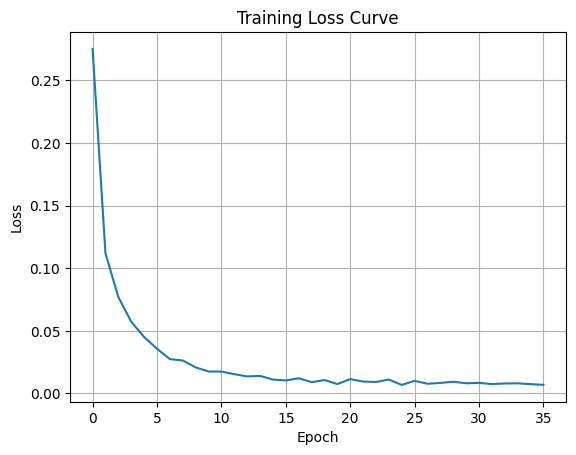

In [10]:
# Plotting the training loss curve

plt.plot(mlp.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

We can see that the model converged after 35 epochs and the loss followed an exponential distribution.

In [15]:
# Test accuracy

y_pred = mlp.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 97.56%


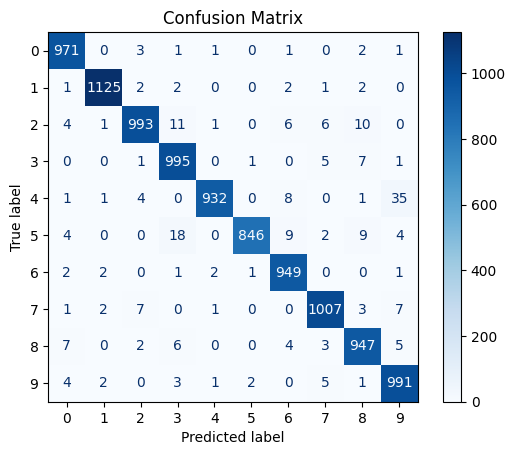

In [17]:
# Plotting the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Training an MLP using Tensorflow

The tensorflow.keras library offers a multilayer perceptron training through the class `Sequential`. For the experiment below I use the following **model configuration**:  
  
- `layers.Input(shape=(784,))`: Input layer.  
  
- `layers.Dense(128, activation='relu')`, `layers.Dense(64, activation='relu')`: Fully connected hidden layers which use the Rectified Liniar Unit activation function.
  
- `layers.Dense(10, activation='softmax')`: Output layer, which uses the Softmax activation function to transform output values into probabilities.

In [14]:
# Build a tensorflow MLP model with 2 hidden layers
from keras import layers

model = keras.Sequential([
  layers.Input(shape=(784,)),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

Following the model configuration is the oprimizer, for which I use Adam (as previously). For the experiment below I use the following **optimizer configuration**:  
  
- `learning_rate=0.001`: The default leraning rate. It controls the size of a step taken when updating model weights during training.
  
For the model compilation I use the following **compiltaion configuration**:  
  
- `optimizer=optimizer`: Adam optimizer with set learning rate.
  
- `loss='sparse_categorical_crossentropy'`: Computes the probabilistic loss between the labels and predictions. The sparce version is used since the label data is stored as indexes.
  
- `metrics=['accuracy']`: Use accuracy to evaluate performance of the model. Does not affect training.

In [15]:
# Compile the model
from keras import optimizers

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

For the training part, I use the following **training configuration**:  
  
- `validation_split=0.2`: Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
  
- `epochs=20`: Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
  
- `batch_size=64`: Number of samples per gradient update.

In [16]:
# Train the model

history = model.fit(
  x_train, y_train,
  validation_split=0.2,
  epochs=20,
  batch_size=64
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8447 - loss: 0.5470 - val_accuracy: 0.9532 - val_loss: 0.1615
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9608 - loss: 0.1287 - val_accuracy: 0.9653 - val_loss: 0.1193
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9738 - loss: 0.0893 - val_accuracy: 0.9731 - val_loss: 0.0966
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9817 - loss: 0.0609 - val_accuracy: 0.9715 - val_loss: 0.1000
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9851 - loss: 0.0473 - val_accuracy: 0.9738 - val_loss: 0.0882
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9882 - loss: 0.0368 - val_accuracy: 0.9712 - val_loss: 0.0982
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9728 - val_loss: 0.1032
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9931 - loss: 0.0218 - val_accuracy: 0.

Execution time: 1m 16.3s

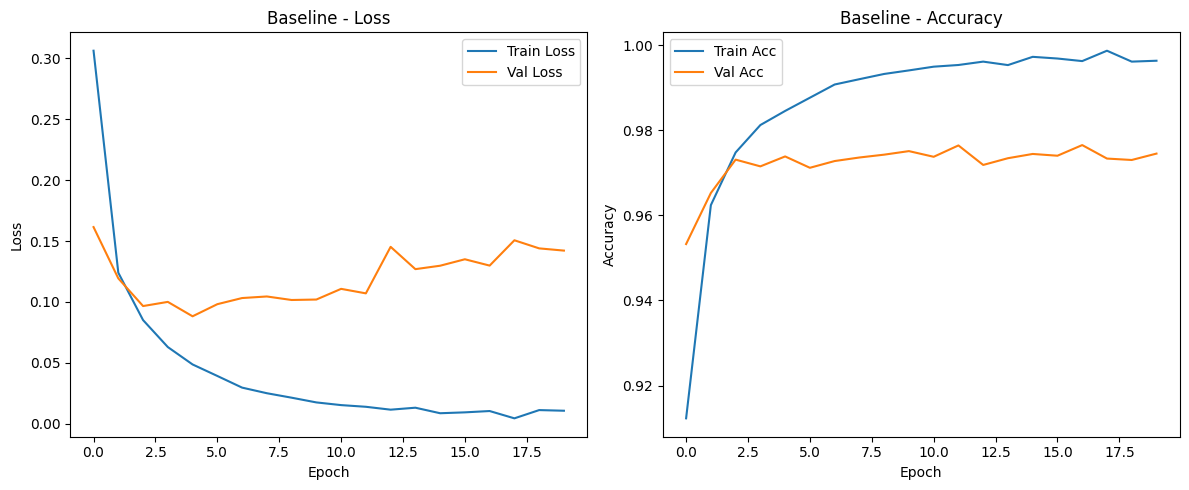

In [17]:
def plot_history(history, title=""):
  plt.figure(figsize=(12, 5))

  # Loss
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Val Loss')
  plt.title(f'{title} - Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # Accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Train Acc')
  plt.plot(history.history['val_accuracy'], label='Val Acc')
  plt.title(f'{title} - Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

plot_history(history, title="Baseline")

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9701 - loss: 0.1525
Test Accuracy: 97.53%
